<a href="https://colab.research.google.com/github/aronbelodi/CarSaleAnalytics/blob/main/Car_Sale_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))

Saving Updated_Car_Sales_Data.csv to Updated_Car_Sales_Data.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(filename)

sns.set(style="whitegrid")

df.head(10)

,Car Make,Car Model,Year,Mileage,Price,Fuel Type,Color,Transmission,Options/Features,Condition,Accident
0,Hyundai,Tucson,2010,52554,44143.820,Hybrid,Black,Automatic,Heated Seats,Used,No
1,Land Rover,Range Rover,2016,115056,25414.060,Diesel,Silver,Manual,GPS,Used,No
2,Honda,Accord,2022,18044,28262.872,Electric,Yellow,Manual,"Bluetooth, Leather Seats, Backup Camera, GPS",Like New,Yes
3,Kia,Soul,2011,79251,28415.848,Hybrid,Orange,Manual,"Backup Camera, GPS, Heated Seats, Leather Seats",New,Yes
4,Volkswagen,Golf,2022,40975,31509.792,Electric,Silver,Automatic,"Leather Seats, Remote Start, Sunroof, Heated S...",New,Yes
5,Land Rover,Velar,2020,97842,6594.720,Gasoline,Green,Automatic,"Backup Camera, Sunroof, Remote Start",Like New,Yes
6,Mazda,CX-9,2014,35192,23226.450,Electric,White,Manual,Sunroof,Used,No
7,Audi,Q5,2016,109975,22862.648,Hybrid,Gray,Manual,"GPS, Backup Camera",New,Yes
8,Audi,Q7,2018,55830,45766.520,Electric,Silver,Automatic,"Bluetooth, Leather Seats",New,No
9,Chevrolet,Traverse,2012,24753,10377.264,Hybrid,Yellow,Manual,"Leather Seats, Sunroof, GPS",Used,Yes


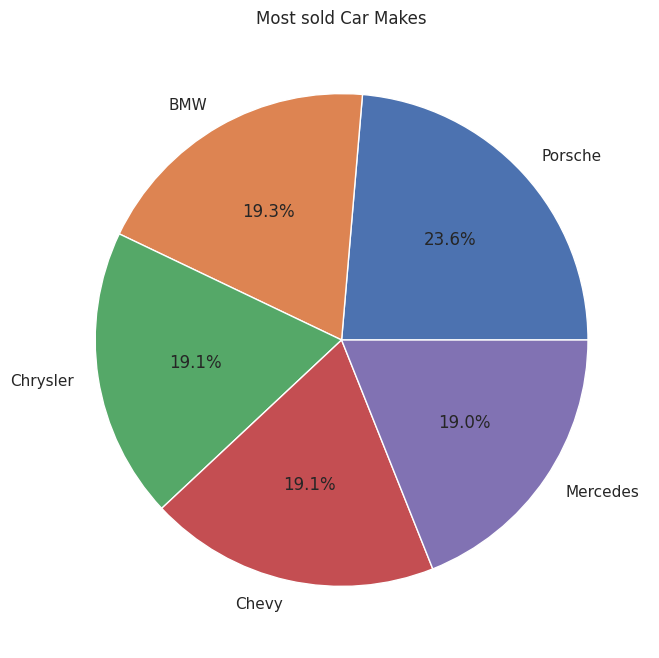

In [6]:
car_make_sales = df.groupby('Car Make')['Car Make'].count().sort_values(ascending=False)

top_5 = car_make_sales.head(5)

plt.figure(figsize=(8, 8))
top_5.plot(kind='pie', autopct='%1.1f%%')
plt.title('Most sold Car Makes')
plt.ylabel('')
plt.show()

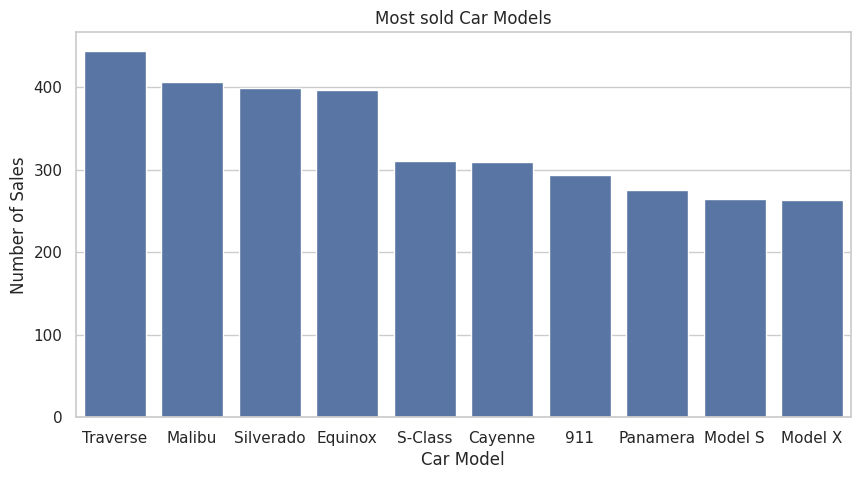

In [7]:
car_model_sales = df.groupby('Car Model')['Car Model'].count().sort_values(ascending=False)

top_5 = car_model_sales.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_5.index, y=top_5.values)
plt.title('Most sold Car Models')
plt.xlabel('Car Model')
plt.ylabel('Number of Sales')
plt.show()

<Figure size 800x800 with 0 Axes>

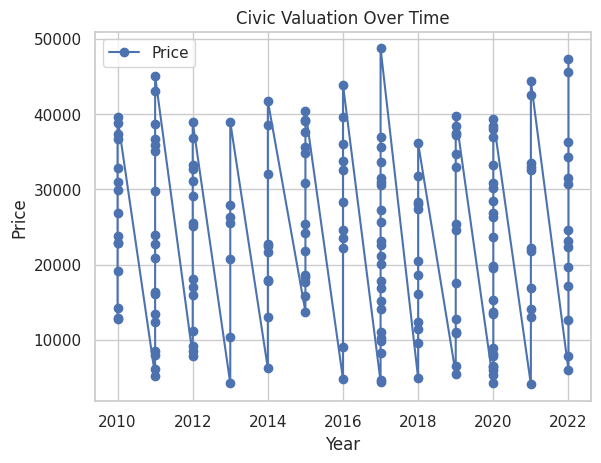

In [8]:
model = 'Civic'
df_model = df[df['Car Model'] == model]

df_model = df_model.sort_values(by=['Year', 'Price'])

plt.figure(figsize=(8, 8))
df_model.plot(x='Year', y='Price', marker='o')
plt.title(f'{model} Valuation Over Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

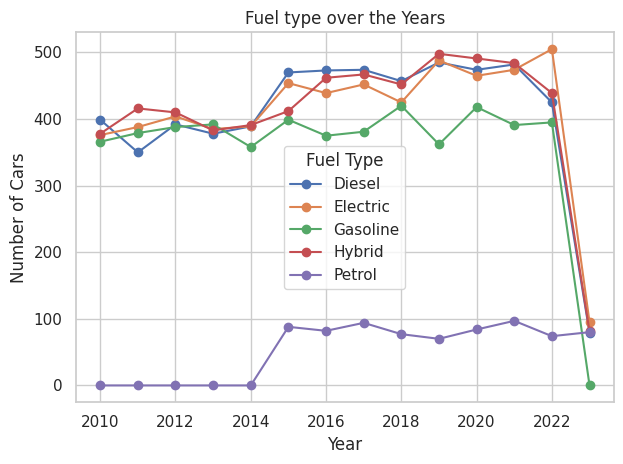

In [11]:
fuel_type_evolution = df.groupby(['Year', 'Fuel Type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
fuel_type_evolution.plot(kind='line', marker='o')
plt.title('Fuel type over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()